In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#sns.set(rc={'figure.figsize':(11.7,8.27)})

%matplotlib inline

In [2]:
def CategoricalPlots(data, cols, ref='accepted'):
    '''
    Plot categorical data from the DataFrame 'data' using the columns in cols.
    Split the categorical data in line with a label reference
    '''
    if not('dummy' in data.columns):
        data['dummy'] = np.ones(shape = data.shape[0])
    for col in cols:
        print(col)
        counts = data[['dummy', ref, col]].groupby([ref, col], as_index = False).count()
        _ = plt.figure(figsize = (13,4))
        plt.subplot(1, 2, 1)
        temp = counts[counts[ref] == 0][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n not accepted')
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        temp = counts[counts[ref] == 1][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n accepted')
        plt.ylabel('count')
        plt.show()

def BoxPlots(data, columns, ref = ['accepted'], hue='accepted'):
    for column in columns:
        for r in ref:
            fig, ax = plt.subplots(figsize=(11.7,8.27))
            sns.boxplot(x=r, ax=ax, y=column, data=data, hue=hue)
            plt.xlabel(r)
            plt.ylabel(column)
            plt.show()
        
def DistPlots(data, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(11.7,8.27))
        ax = sns.distplot(data[column], ax=ax)
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Histogram of ' + column)
        plt.show()
        
def DistPlotsSplit(data, columns, ref=''):
    '''
    Plot several distributions with a reference column
    '''
    if ref != '':
        unique = data[ref].unique()
    for column in columns:
        if ref != '':
            ax = sns.distplot(data.loc[data[ref]==unique[0], column])
            ax = sns.distplot(data.loc[data[ref]==unique[1], column], ax=ax)
        else:
            ax = sns.distplot(data[column])
        plt.xlabel('value')
        plt.ylabel('density')
        plt.title('Histogram of ' + column)
        plt.show()
    

In [14]:
def ReplaceNaN(data, ref, col, how='mean'):
    '''
    Replacing a NaN value with a random number from a normal distribution.
    Parameter how defines whether the value will be coming from a normal distribution "mean"
    or a simple "median" value of the reference column.
    '''
    if ref == col:
        replace_mean = data[col].mean()
        replace_std = data[col].std()
        replace_value = np.random.normal(loc=replace_mean, scale=replace_std)
        data.loc[(data[col].isnull()), col] = replace_value
    else:
        unique_values = data[ref].unique()
        if unique_values.shape[0] < 500:
            for value in unique_values:
                if how =='mean':
                    replace_mean = data[data[ref]==value][col].mean()
                    replace_std = data[data[ref]==value][col].std()
                    replace_value = np.random.normal(loc=replace_mean, scale=replace_std)
                elif how == 'median':
                    replace_value = data[data[ref]==value][col].median()
                data.loc[(data[ref]==value) & (data[col].isnull()), col] = replace_value               
        else:
            raise('ReplaceNaN: too many unique values to fill')    

from sklearn import preprocessing
            
def encode_category(numeric_category):
    ## First encode the strings to numeric categories
    #enc = preprocessing.LabelEncoder()
    #enc.fit(cat_features)
    #enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder(categories='auto')
    encoded = ohe.fit(numeric_category.values.reshape(-1,1))
    return encoded.transform(numeric_category.values.reshape(-1,1)).toarray()
            
def PrepareFeatures(data, cols):
    '''
    Use one-hot-encoder to encode the categorical features.
    The columns to encode in the dataset are defined by the cols_categorical list
    '''
    features = np.array([])
    for col in cols:
        temp = encode_category(data[col])
        if features.shape[0] == 0:
            features = temp
        else:
            features = np.concatenate([features, temp], axis = 1)
    return features

In [4]:
train_data = pd.read_csv('train_values.csv', index_col=0)
lender_classification = pd.read_csv('lender_classification.csv', index_col='lender')
train_data['lender_classification'] = train_data['lender'].apply(lambda x: lender_classification.loc[x, 'accept_rate'])
print(train_data.shape)
train_data.head()

(500000, 22)


,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,lender_classification
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,0.837209
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0.168919
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,0.489632
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,0.691964
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,0.542994


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 22 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [6]:
cols_numerical = ['loan_amount', 'applicant_income', 'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
                  'ffiecmedian_family_income', 'minority_population_pct', 'tract_to_msa_md_income_pct','population',
                 'lender_classification']
cols_categorical = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 
                    'applicant_ethnicity', 'applicant_race', 'applicant_sex','co_applicant']

cols_property_location = ['msa_md', 'state_code', 'county_code']

cols_lender = ['lender']

In [8]:
#train_data['income_approximated'] = train_data[['loan_amount','applicant_income']].apply(lambda x: 30.29 + 0.3458 * x[0] if (np.all(pd.isnull(x[1]))) else x[1], axis = 1)
#ReplaceNaN(train_data, 'msa_md', 'applicant_income', how='mean')

#train_data['is_minority'] = train_data['applicant_race'].apply(lambda x: 0 if x==5 else 1)

#train_data['number_of_1_to_4_family_units'].fillna(method='ffill', inplace=True)
#train_data['number_of_owner-occupied_units'].fillna(method='ffill', inplace=True)

#train_data['number_of_1_to_4_family_units'].fillna(value = -1000, inplace=True)
#train_data['number_of_owner-occupied_units'].fillna(value = -1000, inplace=True)
#train_data.fillna(value=-1, inplace=True)

for col in train_data.columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

In [69]:
train_data['state_code'].replace(to_replace=-1, value=-1000, inplace=True)
train_data['county_code'].replace(to_replace=-1, value=-1000, inplace=True)
train_data['msa_md'].replace(to_replace=-1, value=-1000, inplace=True)

In [9]:
train_data[['applicant_income', 'income_approximated', 'is_minority']].head(20)

,applicant_income,income_approximated,is_minority
row_id,,,
0,24.0,24.0000,0
1,57.0,57.0000,0
2,67.0,67.0000,0
3,105.0,105.0000,0
4,71.0,71.0000,1
5,51.0,51.0000,0
6,104.0,104.0000,0
7,55.0,55.0000,0
8,244.0,244.0000,0


In [9]:
train_labels = pd.read_csv('train_labels.csv', index_col=0)
data = train_data.merge(train_labels, on='row_id')

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 24 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 non-null float64
ffiecmedian_family_income         500000 

In [90]:
data['co_applicant'] = data['co_applicant'].astype('int')

In [ ]:
DistPlots(data, ['log_loan_amount', 'applicant_income'])

In [ ]:
data.head()

## Model fitting

In this section the actual model fitting takes place.

In [1]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.ensemble as ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import feature_selection as fs
import sklearn.tree as tree

import category_encoders as ce

In [4]:
train_data = pd.read_csv('train_values.csv', index_col=0)
print(train_data.shape)
train_data.head()

(500000, 21)


,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
row_id,,,,,,,,,,,,,,,,,,,,,
0,3,1,1,1,70.0,3,18,37,246,2,...,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,3,1,178.0,3,369,52,299,1,...,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,1,3,1,163.0,3,16,10,306,2,...,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,1,1,1,1,155.0,1,305,47,180,2,...,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,1,1,1,1,305.0,3,24,37,20,2,...,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


In [5]:
train_data['income_approximated'] = train_data[['loan_amount',
                                               'applicant_income']].apply(lambda x: 30.29 + 0.3458 * x[0] if (np.all(pd.isnull(x[1]))) else x[1], axis = 1)
#train_data['state_code'].replace(to_replace=-1, value='XX', inplace=True)
#train_data['county_code'].replace(to_replace=-1, value='XX', inplace=True)
#train_data['state_county'] = train_data['state_code'].map(str) + train_data['county_code'].map(str)
#train_data['msa_md'].replace(to_replace=-1, value=-1000, inplace=True)
#for col in train_data.columns:
#    train_data[col].fillna(train_data[col].mean(), inplace=True)


In [6]:
train_data.fillna(value = -1, inplace=True)

In [7]:
lender_classification = pd.read_csv('lender_classification.csv', index_col='lender')
train_data['lender_classification'] = train_data['lender'].apply(lambda x: lender_classification.loc[x, 'accept_rate'])

In [8]:
train_labels = pd.read_csv('train_labels.csv', index_col=0)
data = train_data.merge(train_labels, on='row_id')

In [11]:
#smpl = data.sample(50000)
#smpl = data[data['state_code']==-1]
smpl = data.copy()

In [9]:
data_state = data.groupby('state_code').agg('mean')
data['state_rate'] = data['state_code'].apply(lambda x: data_state.loc[x]['accepted'])

In [10]:
data_msa = data.groupby('msa_md').agg('mean')
data['msa_rate'] = data['msa_md'].apply(lambda x: data_msa.loc[x]['accepted'])

In [28]:
#if not('lender_size' in cols_categorical):
#    cols_categorical.extend(['lender_size'])
#cols_categorical

all_features = ['state_code',
                'lender',
                      #'loan_type',
                      'property_type',
                      'loan_purpose',
                      'co_applicant',
                      'preapproval',
                      #'occupancy',
                      'applicant_race',
                      'applicant_sex',
                      'applicant_ethnicity',
                       'msa_md',
                       'applicant_income',
                       'loan_amount',
                       'number_of_owner-occupied_units',
                       'minority_population_pct',
                       'ffiecmedian_family_income',
                       'tract_to_msa_md_income_pct',
                       'number_of_1_to_4_family_units',
                       'population']

cat_features_to_add= [#'state_code',
                      #'loan_type',
                      'property_type',
                      'loan_purpose',
                      'co_applicant',
                      'preapproval',
                      #'occupancy',
                      'applicant_race',
                      'applicant_sex',
                      'applicant_ethnicity',
                      #'msa_md'
                     ]

cat_features_to_add_test= ['state_county',
                      #'loan_type',
                      'property_type',
                      'loan_purpose',
                      'co_applicant',
                      'preapproval',
                      #'occupancy',
                      'applicant_race',
                      'applicant_sex',
                      'applicant_ethnicity',
                      #'msa_md'
                     ]


num_features_to_add= ['lender_classification',
                      'state_rate',
                      #'msa_rate',
                       'income_approximated',
                       'loan_amount',
                       'number_of_owner-occupied_units',
                       'minority_population_pct',
                       'ffiecmedian_family_income',
                       'tract_to_msa_md_income_pct',
                       'number_of_1_to_4_family_units',
                       'population'
                      ]


In [30]:
np.random.seed(23423)
inside = ms.KFold(n_splits=10, shuffle=True)
np.random.seed(73743)
outside = ms.KFold(n_splits=10, shuffle=True)

np.random.seed(34543)
# Hyperparameters for AdaBoostClassifier
parameter_grid = {'n_estimators': [300, 350, 400, 500],
                  'max_features': [0.1, 0.25, 0.35, 0.5]}
rfc_mdl = RandomForestClassifier(criterion="entropy", n_jobs=7)

clf = ms.GridSearchCV(estimator=rfc_mdl, 
                      param_grid = parameter_grid, 
                      cv=inside, 
                      scoring = 'accuracy',
                      return_train_score = True
                     )

In [29]:
use_hasher = False
use_state_county = False
use_category = True

if use_category:
    if use_state_county:
        enc = preprocessing.LabelEncoder()
        smpl['state_county'] = enc.fit_transform(train_data['state_county'])

    if use_hasher:
        print('Using hashing encoder')
        hasher = ce.HashingEncoder(n_components = 100, cols=cat_features_to_add)
        features_to_test = np.array(hasher.fit_transform(smpl))[:,0:hasher.n_components]
        print(features_to_test.shape)
    else:
        print('Using One hot encoder')
        features_to_test = PrepareFeatures(smpl, cat_features_to_add)
    
if features_to_test.shape[0]!=0:
    features_to_test = np.concatenate([features_to_test, np.array(smpl[num_features_to_add])], axis = 1)
else:
    features_to_test = np.array(smpl[num_features_to_add])

scaler = preprocessing.RobustScaler().fit(features_to_test)
features_to_test = scaler.transform(features_to_test)

X_train, X_test, y_train, y_test = train_test_split(features_to_test, smpl['accepted'], test_size=0.3) # 70% training and 30% test

Using One hot encoder


In [93]:
cat_features_to_add

['state_county',
 'property_type',
 'loan_purpose',
 'co_applicant',
 'preapproval',
 'applicant_race',
 'applicant_sex',
 'applicant_ethnicity']

In [23]:
clf.fit(features_to_test, smpl['accepted'])

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=7,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [300, 350, 400, 500], 'max_features': [0.1, 0.25, 0.35, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [54]:
keys = list(clf.cv_results_.keys())
for key in keys:
    print(key)
    print(clf.cv_results_[key])
## And print the best parameter value
print('n_estimators', clf.best_estimator_.n_estimators)
print('max_features', clf.best_estimator_.max_features)

mean_fit_time
[10.56322031 12.09673476 13.86964216 17.28435831 19.02165823 22.05941133
 25.36156864 31.40228996 24.0245012  28.16746585 32.19186604 40.11702437
 32.95224035 39.65093555 47.77127199 59.90778198]
std_fit_time
[0.25770759 0.12642421 0.13523209 0.12853242 0.14626131 0.12086862
 0.30365895 0.17392282 0.11480374 0.28857329 0.22841778 0.30904675
 0.20331127 1.64536847 0.22602618 1.28489783]
mean_score_time
[0.20632565 0.20613983 0.20633359 0.30719647 0.2069396  0.20630217
 0.20655944 0.30819671 0.20675678 0.20635631 0.20627239 0.21633933
 0.20707338 0.20641468 0.20673318 0.26725059]
std_score_time
[0.00059943 0.00062993 0.0003023  0.00044937 0.0011233  0.00054983
 0.00029598 0.00119628 0.00056494 0.00031286 0.0003867  0.03073703
 0.00062957 0.00056821 0.00086957 0.04984197]
param_max_features
[0.1 0.1 0.1 0.1 0.25 0.25 0.25 0.25 0.35 0.35 0.35 0.35 0.5 0.5 0.5 0.5]
param_n_estimators
[300 350 400 500 300 350 400 500 300 350 400 500 300 350 400 500]
params
[{'max_features': 0.1

In [62]:
plot_scores = clf.cv_results_['mean_test_score'].reshape(4,4)

Text(33.0, 0.5, 'n_estimators')

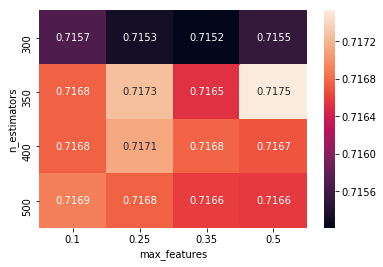

In [80]:
ax = sns.heatmap(plot_scores, annot=True, fmt='.4f', 
                 xticklabels=parameter_grid['max_features'], 
                 yticklabels=parameter_grid['n_estimators'])
ax.set_xlabel('max_features')
ax.set_ylabel('n_estimators')

In [63]:
features_to_test.shape

(10000, 88)

In [30]:
lr = linear_model.LogisticRegression(C=1, solver='liblinear') 
model_rl = lr.fit(X_train, y_train)

y_pred = model_rl.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7091933333333333


With 'income approximated' and 'lender classification - accuracy 0.6786 (not really higher than with lender only)
Accuracy: 0.6786333333333333
Accuracy: 0.6779066666666667

Added loan purpose:
Accuracy: 0.6800333333333334

Added state code - removed loan purpose
Accuracy: 0.6787866666666666

state_code encoded using a hasher:
Accuracy: 0.6817066666666667

added_county_code to hasher - only sample of 10000
Accuracy: 0.6626666666666666

added loan purpose:
Accuracy: 0.672

In [18]:
abc = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
model_abc = abc.fit(X_train, y_train)
y_pred = model_abc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7126933333333333


Accuracy: 0.6947
Accuracy: 0.6968466666666666 array([0.416, 0.348, 0.236])

added loan purpose:
Accuracy: 0.7007933333333334 array([0.076, 0.036, 0.   , 0.388, 0.336, 0.164])

added state code - removed loan purpose:
Accuracy: 0.7028133333333333 array([0.384, 0.252, 0.18 , 0.184])

state_code encoded using a hasher:
Accuracy: 0.7037866666666667 array([0.12 , 0.   , 0.012, 0.   , 0.004, 0.   , 0.   , 0.   , 0.392,
       0.276, 0.196])
       
added county code to hasher (sample of 10000):
Accuracy: 0.682 array([0.092, 0.   , 0.   , 0.024, 0.008, 0.   , 0.008, 0.   , 0.304,
       0.204, 0.36 ])

Accuracy: 0.6936666666666667 array([0.096, 0.   , 0.004, 0.024, 0.02 , 0.   , 0.004, 0.008, 0.356,
       0.252, 0.236])
       
Accuracy: 0.7126666666666667

In [22]:
model_abc.feature_importances_

array([0.065, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.025, 0.   , 0.   , 0.   , 0.015, 0.   , 0.085, 0.02 , 0.   ,
       0.01 , 0.02 , 0.   , 0.01 , 0.   , 0.   , 0.   , 0.035, 0.   ,
       0.04 , 0.   , 0.035, 0.   , 0.   , 0.   , 0.02 , 0.01 , 0.03 ,
       0.   , 0.   , 0.315, 0.13 , 0.025, 0.045, 0.03 , 0.035])

In [31]:
rfc = RandomForestClassifier(n_estimators=400,max_features=0.25, n_jobs=7,
                                criterion="entropy", class_weight="balanced")
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7234933333333333


Accuracy: 0.6781133333333333
Accuracy: 0.6560333333333334
Accuracy: 0.6701666666666667 array([0.39217653, 0.25896841, 0.34885506])

added state code:
Accuracy: 0.69026 array([0.3192765 , 0.24876468, 0.28956225, 0.14239657])

state_code encoded using a hasher
Accuracy: 0.6857466666666666 array([0.0188833 , 0.00277968, 0.00272961, 0.00274159, 0.00329362,
       0.00299558, 0.00306097, 0.00325407, 0.3557482 , 0.28622352,
       0.31828986])

added county_code to hasher (sample of 10000)
 Accuracy: 0.656 array([0.03060564, 0.01127349, 0.01189549, 0.01212234, 0.01520779,
       0.01342228, 0.01193938, 0.01348524, 0.34897426, 0.26226914,
       0.26880496])
       
Accuracy: 0.6696666666666666

In [87]:
model_rfc.feature_importances_

array([1.85958268e-03, 1.15985855e-03, 1.00015445e-03, 4.04000206e-03,
       2.31268667e-03, 2.42140927e-03, 1.49426645e-03, 4.40012798e-03,
       2.72084714e-04, 5.07383161e-04, 2.03097587e-03, 2.66641986e-03,
       1.97028513e-04, 3.02417682e-04, 2.32645785e-04, 1.95798275e-03,
       3.83557809e-04, 2.69912027e-03, 2.50852759e-04, 6.71701128e-04,
       2.33420368e-04, 1.22464108e-03, 1.82703717e-03, 2.78232332e-03,
       3.39164576e-04, 5.04280559e-04, 2.71907512e-03, 2.68365009e-03,
       4.32397968e-04, 2.37014108e-03, 9.67126116e-04, 1.62441538e-03,
       1.59729795e-03, 2.40808392e-03, 7.62595034e-04, 1.55486377e-03,
       6.78236102e-04, 1.33337217e-03, 4.76489657e-03, 1.70304120e-03,
       8.76212126e-04, 1.69267903e-03, 2.25405973e-03, 6.37375241e-04,
       5.26206779e-04, 1.18285477e-03, 1.03006719e-03, 1.33621145e-03,
       2.88475303e-03, 2.64627011e-03, 4.17887350e-04, 1.85521174e-04,
       1.50509969e-03, 1.98089103e-03, 2.04572992e-03, 1.57843363e-04,
      

In [168]:
metrics.confusion_matrix(y_test, y_pred)

array([[5547,   26],
       [ 100,   67]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

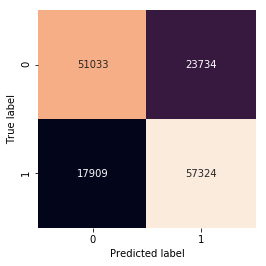

In [122]:
ax = sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False, square=True)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

([<matplotlib.axis.XTick at 0x23c82747940>,
 <a list of 9 Text xticklabel objects>)

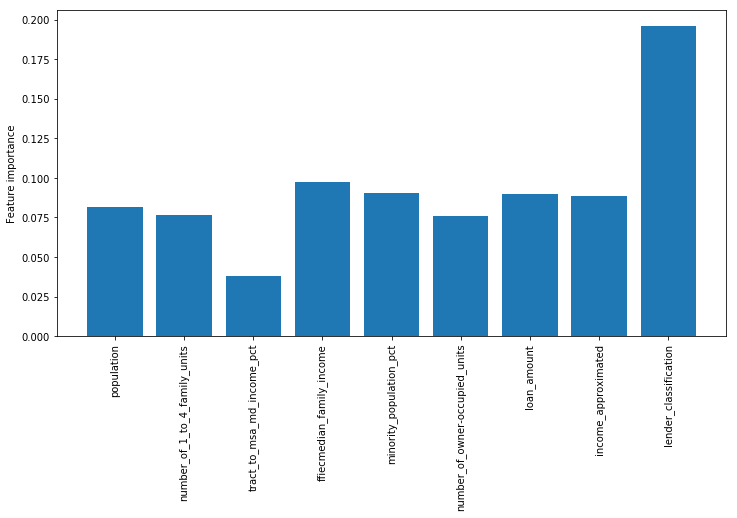

In [111]:
importance_labels = num_features_to_add[::-1]
for i in range(len(importance_labels),features_to_test.shape[1]):
    importance_labels.append('')

plt.figure(figsize=(12, 6))
plt.bar(range(0, len(model_rfc.feature_importances_[:78:-1])), model_rfc.feature_importances_[:78:-1], align="center")
plt.ylabel('Feature importance')
plt.xticks(range(0, len(model_rfc.feature_importances_[:78:-1])), importance_labels, rotation=90)

In [52]:
fpr, tpr , _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(y_pred.shape)

(150000,)


In [113]:
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.72238
0.7071973155024797
0.7619528664282961
0.7335547152427202


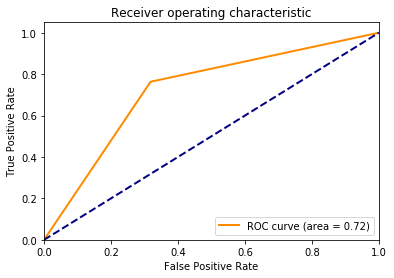

In [47]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [32]:
scores = ms.cross_val_score(rfc, X_train, y_train, cv=10, scoring='accuracy')

In [33]:
print(scores)

[0.72357933 0.72471429 0.72108571 0.72791429 0.72574286 0.72034286
 0.72368571 0.72291429 0.72048571 0.72444927]


In [17]:
rfc2 = RandomForestClassifier(n_estimators=500, n_jobs=7,
                                criterion="entropy")
model_rfc2 = rfc2.fit(X_train, y_train)
y_pred = model_rfc2.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.72042


In [57]:
scores = ms.cross_val_score(rfc2, X_train, y_train, cv=10, scoring='accuracy')

In [58]:
print(scores)

[0.72143653 0.72160795 0.72246507 0.72014286 0.72305714 0.72168571
 0.72588571 0.72310637 0.72690648 0.72439213]


In [31]:
metrics.confusion_matrix(y_test, y_pred)

array([[50801, 24212],
       [17471, 57516]], dtype=int64)

In [155]:
rfc_vote = RandomForestClassifier(n_estimators=500, n_jobs=7, criterion="entropy")
abc_vote = AdaBoostClassifier(n_estimators=200, learning_rate=0.1)
lr_vote = linear_model.LogisticRegression(C=1, solver='liblinear')

vc = ensemble.VotingClassifier(estimators = [('rfc', rfc_vote), ('abc', abc_vote), ('lr', lr_vote)], 
                              n_jobs = 7, voting = 'soft')

vc_model = vc.fit(X_train, y_train)
y_pred = vc_model.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7056666666666667


In [37]:
etc = ensemble.ExtraTreesClassifier(n_estimators = 500, n_jobs=7)
model_etc = etc.fit(X_train, y_train)
y_pred = model_etc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7034333333333334


In [ ]:
import category_encoders as ce

smpl = data.sample(100000)
    
num_features_to_test = ['property_type',
                        'loan_purpose', 
                        'preapproval', 
                        'applicant_ethnicity', 
                        'applicant_race', 
                        'applicant_sex',
                         'co_applicant'
                         'msa_md'
                         'state_code',
                         'county_code']

features_num = ['loan_amount',
                   'income_approximated',
                   'lender_classification',
                   'number_of_owner-occupied_units',
                   'number_of_1_to_4_family_units',
                   'accepted']


D
features.shape

X_train, X_test, y_train, y_test = train_test_split(features.iloc[:,0:70+5], features['accepted'], test_size=0.3) # 70% training and 30% test

for n in range(2,11,1):
    mlp = MLPClassifier(hidden_layer_sizes = (100,n), activation='logistic')
    model_mlp = mlp.fit(X_train, y_train)

    y_pred = model_mlp.predict(X_test)

    print('Depth:', n,"Accuracy:", metrics.accuracy_score(y_test, y_pred))


Using a cycle for the number of components in the resulting hash columns from 10 until 200 and by applying an AdaBoostClassifier(n_estimators=250, learning_rate=0.1), the resulting accuracy is as follows:

-  n= 10 Accuracy: 0.7017666666666666
-  n= 20 Accuracy: 0.7078
-  n= 30 Accuracy: 0.7077666666666667
-  n= 40 Accuracy: 0.7084
-  n= 50 Accuracy: 0.7127333333333333
-  n= 60 Accuracy: 0.7099
-  n= 70 Accuracy: 0.7135
-  n= 80 Accuracy: 0.7084333333333334
-  n= 90 Accuracy: 0.7105666666666667
-  n= 100 Accuracy: 0.7060333333333333
-  n= 110 Accuracy: 0.7055
-  n= 120 Accuracy: 0.7077333333333333
-  n= 130 Accuracy: 0.7022333333333334
-  n= 140 Accuracy: 0.7043333333333334
-  n= 150 Accuracy: 0.7045333333333333
-  n= 160 Accuracy: 0.7073666666666667
-  n= 170 Accuracy: 0.7005333333333333
-  n= 180 Accuracy: 0.7032
-  n= 190 Accuracy: 0.7053333333333334
-  n= 200 Accuracy: 0.707033333333333

It seems that the highest accuracy is achieved by the n_estimators = 70

Using a MPClassifier, changing the the activation from default to logistic improved the accuracy from 0.69 to 0.71.
Changing the hiddle_layer_sizes from 100 to 150 lowered the accuracy score significantly, from 0.71 to 0.68

In [ ]:
data_encoded.iloc[:,0:15].head(50)

In [ ]:
model_rfc_large.feature_importances_

In [24]:
features_to_test = np.concatenate([features_to_test, np.array(data[features_to_add])], axis = 1)

In [84]:
features_to_test.shape

(10000, 88)

In [ ]:
print(features.shape)

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.9 * (1 - .9)))
features_reduced = sel.fit_transform(features)

## Print the support and shape for the transformed features
print(sel.get_support())
print(features_reduced.shape)

In [29]:
abc = AdaBoostClassifier(n_estimators=250, learning_rate=0.1)
model_abc = abc.fit(X_train, y_train)
y_pred = model_abc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.712775


In [30]:
model_abc.feature_importances_

array([0.   , 0.056, 0.   , 0.008, 0.   , 0.016, 0.   , 0.084, 0.024,
       0.   , 0.   , 0.024, 0.   , 0.   , 0.016, 0.   , 0.028, 0.008,
       0.004, 0.068, 0.16 , 0.316, 0.096, 0.   , 0.072, 0.02 ])

In [31]:
rfc = RandomForestClassifier(n_estimators=500,max_features=0.25, n_jobs=7,
                                criterion="entropy", class_weight="balanced")
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.719645


In [32]:
model_rfc.feature_importances_

array([0.00538707, 0.00451853, 0.0037426 , 0.00119373, 0.00310923,
       0.00380315, 0.00035662, 0.01387806, 0.0041958 , 0.00611585,
       0.0041452 , 0.00413217, 0.00046432, 0.00328947, 0.00355778,
       0.00499647, 0.00281881, 0.00239807, 0.00229865, 0.12998585,
       0.12821327, 0.21150334, 0.08375047, 0.10573228, 0.13334499,
       0.13306823])

In [33]:
rfc2 = RandomForestClassifier(n_estimators=500,max_features=0.25, n_jobs=7,
                              criterion='entropy', class_weight={0:0.1, 1:0.9})
model_rfc2 = rfc2.fit(X_train, y_train)
y_pred = model_rfc2.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71819


In [34]:
metrics.confusion_matrix(y_test, y_pred)

array([[69764, 30583],
       [25779, 73874]], dtype=int64)

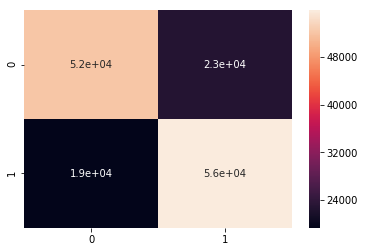

In [155]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [47]:
model_rfc2.feature_importances_

array([0.00670867, 0.00560977, 0.00491014, 0.00137961, 0.0026791 ,
       0.00310775, 0.00024237, 0.0107644 , 0.00326387, 0.004708  ,
       0.00435327, 0.00437131, 0.00035767, 0.00304016, 0.00424461,
       0.00474847, 0.00373062, 0.00475839, 0.0026361 , 0.00080131,
       0.00092245, 0.00228131, 0.00253162, 0.00071351, 0.00313436,
       0.00212993, 0.00080287, 0.00906609, 0.00888658, 0.00194704,
       0.00087898, 0.00927379, 0.00314838, 0.11394992, 0.11258087,
       0.18704397, 0.07829692, 0.07278866, 0.0951159 , 0.10910935,
       0.1089819 ])

The clasifier below has so far provided the highest accuracy after the submission - 0.7173. The actual accuracy on the train data is 0.7235, therefore there is some overfitting. The file is "submission_v6.csv" which contains the fitted information

In [52]:
rfc_large = RandomForestClassifier(n_estimators=400, max_features=0.25, n_jobs=7,
                                criterion="entropy", class_weight="balanced")
model_rfc_large = rfc_large.fit(X_train, y_train)
y_pred = model_rfc_large.predict(X_test)
        
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6583333333333333


In [ ]:
model_rfc_large.feature_importances_

In [50]:
lr = linear_model.LogisticRegression(penalty='l1', C=1000, solver='liblinear', class_weight={0:0.55, 1:0.45}, n_jobs=7) 
model_rl = lr.fit(X_train, y_train)

y_pred = model_rl.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

C:\Users\Tomas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 7.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Accuracy: 0.69826


In [ ]:
etc = ensemble.BaggingClassifier()
model_etc = etc.fit(X_train, y_train)

y_pred = model_etc.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [152]:
mlp = MLPClassifier(hidden_layer_sizes=(20,100,90,70,10,5), activation='logistic', alpha=0.01, max_iter=600)
model_mlp = mlp.fit(X_train, y_train)

y_pred = model_mlp.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.49866666666666665


### Hyperparameter optimization

In [ ]:
np.random.seed(23423)
inside = ms.KFold(n_splits=10, shuffle=True)
np.random.seed(73743)
outside = ms.KFold(n_splits=10, shuffle=True)

In [ ]:
np.random.seed(34543)
# Hyperparameters for AdaBoostClassifier
parameter_grid = {'n_estimators': [200, 250, 400, 500, 700],
                  'max_features': [0.1, 0.25, 0.5, 1]}
rfc_mdl = RandomForestClassifier(criterion="entropy", class_weight="balanced")

clf = ms.GridSearchCV(estimator=rfc_mdl, 
                      param_grid = parameter_grid, 
                      cv=inside, 
                      scoring = 'accuracy',
                      return_train_score = True
                     )

In [ ]:
data_samples = data.sample(50000)
sample_features = PrepareFeatures(data_samples, cols_categorical)

sample_features = np.concatenate([sample_features, np.array(data_samples[features_to_add])], axis = 1)

clf.fit(sample_features, data_samples['accepted'])

In [ ]:
keys = list(clf.cv_results_.keys())
for key in keys[6:16]:
    print(clf.cv_results_[key])
## And print the best parameter value
print('n_estimators', clf.best_estimator_.n_estimators)
print('max_features', clf.best_estimator_.max_features)


[{'max_features': 0.1, 'n_estimators': 200}, {'max_features': 0.1, 'n_estimators': 250}, {'max_features': 0.1, 'n_estimators': 400}, {'max_features': 0.1, 'n_estimators': 500}, {'max_features': 0.1, 'n_estimators': 700}, {'max_features': 0.25, 'n_estimators': 200}, {'max_features': 0.25, 'n_estimators': 250}, {'max_features': 0.25, 'n_estimators': 400}, {'max_features': 0.25, 'n_estimators': 500}, {'max_features': 0.25, 'n_estimators': 700}, {'max_features': 0.5, 'n_estimators': 200}, {'max_features': 0.5, 'n_estimators': 250}, {'max_features': 0.5, 'n_estimators': 400}, {'max_features': 0.5, 'n_estimators': 500}, {'max_features': 0.5, 'n_estimators': 700}, {'max_features': 1, 'n_estimators': 200}, {'max_features': 1, 'n_estimators': 250}, {'max_features': 1, 'n_estimators': 400}, {'max_features': 1, 'n_estimators': 500}, {'max_features': 1, 'n_estimators': 700}]
[0.7022 0.704  0.703  0.704  0.7038 0.7052 0.7084 0.7078 0.711  0.71
 0.7062 0.709  0.7076 0.7084 0.7062 0.6956 0.6928 0.6984 0.6994 0.6992]
[0.7118 0.7112 0.7146 0.7148 0.7138 0.714  0.713  0.712  0.7152 0.7132
 0.7114 0.7154 0.7118 0.7088 0.7138 0.7064 0.7098 0.7108 0.7132 0.7102]
[0.7232 0.7276 0.727  0.7268 0.7264 0.7244 0.7258 0.7244 0.7294 0.7266
 0.7256 0.7238 0.7252 0.726  0.7272 0.7116 0.7156 0.719  0.717  0.7154]
[0.7062 0.71   0.706  0.7076 0.7092 0.7116 0.7126 0.7116 0.7118 0.7152
 0.7082 0.71   0.7114 0.714  0.7148 0.7042 0.71   0.7064 0.7048 0.7058]
[0.7246 0.7274 0.7246 0.725  0.7248 0.7244 0.727  0.7274 0.7256 0.7248
 0.722  0.7236 0.723  0.7214 0.723  0.7216 0.7164 0.7218 0.72   0.7186]
[0.714  0.7102 0.7142 0.7148 0.7116 0.7164 0.7164 0.7166 0.7146 0.715
 0.7154 0.7142 0.7156 0.713  0.71   0.7004 0.7006 0.7092 0.7076 0.7042]
[0.7152 0.7162 0.7154 0.7178 0.7166 0.72   0.7194 0.7178 0.718  0.7176
 0.7102 0.71   0.7108 0.7114 0.712  0.7122 0.7128 0.7094 0.7156 0.7126]
[0.7156 0.7176 0.7178 0.7146 0.7184 0.7148 0.7164 0.7174 0.7172 0.7198
 0.713  0.7138 0.7162 0.7162 0.7178 0.7096 0.711  0.7106 0.7112 0.7132]
[0.7148 0.713  0.715  0.7146 0.7142 0.7162 0.7214 0.7222 0.7194 0.7214
 0.7186 0.721  0.7198 0.721  0.7216 0.7044 0.7054 0.7026 0.7016 0.704 ]
n_estimators 700
max_features 0.25

# Fitting the test data

In [21]:
test_data = pd.read_csv('test_values.csv', index_col=0)
print(test_data.shape)
lender_classification = pd.read_csv('lender_classification.csv', index_col='lender')
test_data['lender_classification'] = test_data['lender'].apply(lambda x: lender_classification.loc[x, 'accept_rate']
                                                              if x in lender_classification.index else 0.5)

#test_data['lender_size'] = test_data['lender'].apply(ClassifyLender, args=[test_data['lender'].value_counts()])
#test_data['is_minority'] = test_data['applicant_race'].apply(lambda x: 0 if x==5 else 1)

#ReplaceNaN(test_data, 'msa_md', 'applicant_income', how='mean')
test_data['income_approximated'] = test_data[['loan_amount','applicant_income']].apply(lambda x: 30.29 + 0.3458 * x[0] if (np.all(pd.isnull(x[1]))) else x[1], axis = 1)
test_data.fillna(value=-1, inplace=True)
#test_data['number_of_1_to_4_family_units'].fillna(method='ffill', inplace=True)
#test_data['number_of_owner-occupied_units'].fillna(method='ffill', inplace=True)

test_data['state_rate'] = test_data['state_code'].apply(lambda x: data_state.loc[x]['accepted'])
test_data['msa_rate'] = test_data['msa_md'].apply(lambda x: data_msa.loc[x]['accepted'])

test_data.info()


(500000, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 25 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  500000 non-null float64
population                        500000 non-null float64
minority_population_pct           500000 non-null float64
ffiecmedian_family_income   

In [32]:
#cat_features_to_add

#num_features_to_add

test_features = PrepareFeatures(test_data, cat_features_to_add)
print(test_features.shape)

test_features = np.concatenate([test_features, np.array(test_data[num_features_to_add])], axis = 1)

scaler = preprocessing.RobustScaler().fit(test_features)
test_features = scaler.transform(test_features)

print(test_features.shape)

(500000, 26)
(500000, 36)


In [33]:
y_test_pred = model_rfc.predict(test_features)

In [34]:
series = pd.Series(y_test_pred)

In [35]:
series.value_counts()

1    273106
0    226894
dtype: int64

In [36]:
test_output = pd.DataFrame(columns=['row_id', 'accepted'])
test_output['accepted'] = series
test_output['row_id'] = test_output.index
test_output= test_output.set_index('row_id')
test_output.head()

,accepted
row_id,
0,1
1,1
2,0
3,1
4,0


In [37]:
test_output.to_csv('submission-v16.csv')